# Zhenfeng Liang

# MTH9879 Homework 10

Assigned: April 28, 2015.
Due: May 12, 2015 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Yu Gan (yugan323@gmail.com), Fubo Shi (fubo.shi.baruch@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TAs Yu Gan and/or Fubo Shi.


### Set up R environment

In [1]:
%load_ext rmagic

## Numerical solution of Fredholm equation

### 1. (12 points)
Consider the Fredholm equation (7) in Lecture 10:

$$
\int_0^T{G}(|t-s|)\,dx_s =\text{const.}\qquad\text{for all $t\in [0,T]$.}
$$

Define $t_i:={i}\frac T{N}$. One way to discretize this integral equation is as follows:

$$
\sum_{j=1}^N G_{ij}\,v_j=\text{const.}
$$

where $v_j=x_{t_{j}}-x_{t_{j-1}}$ and

<a name="eq:1"></a>(1)
$$
G_{ij}=
\int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt.
$$

(a) Derive an explicit expression for the $G_{ij}$ in the case
$$
G(\tau)=\frac {1}{(1+\tau)^2}.
$$
You will need to compute separate expressions for the cases $i \neq j$ and $i=j$.

(b) With $N=512$, use matrix algebra to solve equation [(1)](#eq:1) numerically with this decay kernel.

(c) Plot your results - you should end up with something like the top figure in Figure 2 of Lecture 10.



## Solution

### (a)

We need to consider three cases, $i = j$, $i < j$ and $i > j$.

Case 1, $i < j$

\begin{eqnarray*}
G_{ij}&=&
\int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt. \\
&=& \int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,\frac{1}{(1+s-t)^2}\,ds\,dt.
\end{eqnarray*}

Case 2, $i > j$

\begin{eqnarray*}
G_{ij}&=&
\int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt. \\
&=& \int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,\frac{1}{(1+t-s)^2}\,ds\,dt.
\end{eqnarray*}

Case 3, $i = j$

\begin{eqnarray*}
G_{ij}&=&
\int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt. \\
&=& \int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t}\,\frac{1}{(1+t-s)^2}\,ds + \,\int_{t}^{t_j}\,\frac{1}{(1+s-t)^2}\,ds\,dt.
\end{eqnarray*}

With some calculus, we got,

$$
G_{ij} = \begin{cases} \ln(1 + t_j - t_i) - \ln(1 + t_j - t_{i-1}) + \ln(1 + t_{j-1} - t_{i - 1}) - \ln(1 + t_{j-1} - t_{i}), & \mbox{if } i < j \\ 
\ln(1 + t_i - t_j) - \ln(1 + t_{i-1} - t_{j}) + \ln(1 + t_{i-1} - t_{j - 1}) - \ln(1 + t_{i} - t_{j-1}), & \mbox{if } i > j \\ 
2\,(t_i - t_{i-1}) -2\,\ln(1 + t_i - t_{i-1})  & \mbox{if } j = i\end{cases}
$$

In [2]:
%%R

N = 512
T = 1

cal_G <- function(i, j){

    t_i = i * T / N
    t_j = j * T / N
    t_i_minus_1 = (i - 1) * T / N
    t_j_minus_1 = (j - 1) * T / N
    
    if(i < j)
    {
        result <- log(1 + t_j - t_i) - log(1 + t_j - t_i_minus_1) + log(1 + t_j_minus_1 - t_i_minus_1) - log(1 + t_j_minus_1 - t_i)
    }
    else if(i > j)
    {
        result <- log(1 + t_i - t_j) - log(1 + t_i_minus_1 - t_j) + log(1 + t_i_minus_1 - t_j_minus_1) - log(1 - t_j_minus_1 + t_i)
    
    }
    else
    {
        result <- 2 * (t_i - t_i_minus_1) - 2 * log(1 + t_i - t_i_minus_1)
    }
        
    return (result)
} 


In [3]:
%%R

G <- matrix(, nrow = N, ncol = N)

for (i in 1 : N)
{
    for (j in 1 : N)
    {
        G[i, j] <- cal_G(i,j)
    }    
}

const <- rep(1/100, N)

# Solve for v
v <- solve(G, const)


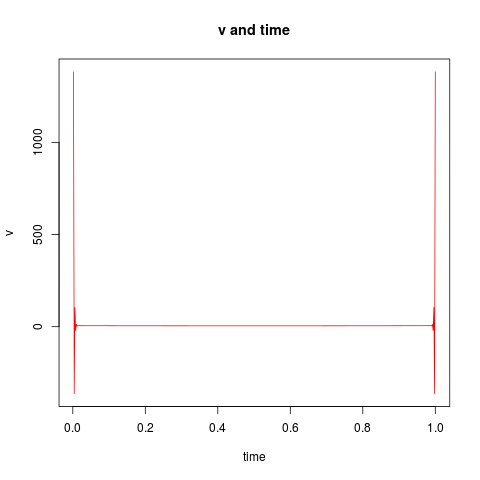

In [4]:
%%R

## (c)

# Construct time
t <- seq(T/N,T,by=T/N)

# plot
plot(t, v, col='red', type='l', main='v and time', ylab='v', xlab='time')

## Optimal interval VWAP strategy in the square-root model

### 2. (12 points)

Consider equation (11) of Lecture 10 for the cost of liquidation using interval VWAPs:

$$
\cC=\sum_{j=1}^m\,C_{jj}+\sum_{i< j}^m\,C_{ji}.
$$

(a) With $m=3$ (that is 3 interval VWAP slices), and assuming the square-root process where

$$
h(v)=\frac  3 4 \sigma\,\sqrt{\frac{v}{V}} =\frac  3 4 \sigma\,\sqrt{\frac{\dot x}{V}}, 
\quad \mbox{ and } \quad
G(\tau)=1/\sqrt{\tau},
$$

compute explicit expressions for the matrix elements $C_{ji}$ in terms of $x_1$, $x_2$, $t_1$, and $t_2$ (noting that $t_0=0$ and $t_3=T$).

(b) Minimize the resulting expression for the expected cost of liquidation numerically to find optimal choices of $x_1$ and $x_2$ when $t_1=T/3$, and $t_2=2 \,T/3$.

(c) What is the percentage saving from trading with the 3-slice strategy relative to a VWAP?

(d) Explain to your non-mathematical manager why this strategy has lower expected cost.

## Solution

### (a)

For self-interaction term,

$$C_{ii}=\frac{x_i}{t_{i}-t_{i-1}}\,h(v_i)\,\int_{t_{i-1}}^{t_i}\,dt\,\int_{t_{i-1}}^{t}\,\frac{1}{\sqrt{t-s}}\,ds=
\frac{4}{3}\,x_i\,h(v_i)\,\sqrt{t_i-t_{i-1}} = \sigma \sqrt{\frac{x_i^3}{V}} \, \forall i = 1 \to 3$$

\begin{eqnarray*}
C_{ji}
&=& \frac{x_j}{t_{j}-t_{j-1}}\,h(v_i)\,\int_{t_{j-1}}^{t_j}\,dt\,\int_{t_{i-1}}^{t_i}\,\frac{1}{\sqrt{t-s}}\,ds\\
&=& \frac{4}{3}\,x_j\,h(v_i)\,\frac{\left(t_{j}-t_{i-1}\right)^{3/2} -\left(t_{j}-t_{i}\right)^{3/2} -\left(t_{j-1}-t_{i 1}\right)^{3/2} +\left(t_{j-1}-t_{i}\right)^{3/2}}{t_{j}-t_{j-1}} \\
&=& \sigma\,x_j\,\sqrt{\frac{x_i}{V\,(t_i - t_{i-1})}}\,\frac{\left(t_{j}-t_{i-1}\right)^{3/2}
-\left(t_{j}-t_{i}\right)^{3/2}
-\left(t_{j-1}-t_{i-1}\right)^{3/2}
+\left(t_{j-1}-t_{i}\right)^{3/2}
}{t_{j}-t_{j-1}}
\end{eqnarray*}

Then we got,

\begin{eqnarray*}
C_{21} &=& \sigma x_2 \sqrt{\frac{x_1}{V}}(2\sqrt{2}-2) \\
C_{31} &=& \sigma x_3 \sqrt{\frac{x_1}{V}}(3\sqrt{3} - 4\sqrt{2} + 1) \\
C_{32} &=& x_3 \sqrt{\frac{x_2}{V}}(2\sqrt{2} - 2)
\end{eqnarray*}

### (b)

The cost of liquidation,

\begin{eqnarray*}
\mathcal{C} &=& \sum_{j=1}^m\,C_{jj}+\sum_{i< j}^m\,C_{ji} = C_{11} + C_{22} + C_{33} + C_{21} + C_{31} + C_{32} \\
&=& \sigma \sqrt{\frac{x_1^3}{V}} + \sigma \sqrt{\frac{x_2^3}{V}} + \sigma \sqrt{\frac{x_3^3}{V}} + \sigma x_2 \sqrt{\frac{x_1}{V}}(2\sqrt{2}-2) + \sigma x_3 \sqrt{\frac{x_1}{V}}(3\sqrt{3} - 4\sqrt{2} + 1) + x_3 \sqrt{\frac{x_2}{V}}(2\sqrt{2} - 2)
\end{eqnarray*}

where $x_1 + x_2 + x_3 = X$

Without loss of generality, we let $\sigma \sqrt{\frac{1}{V}} = 1$

In [5]:
%%R

# Without loss of generality, we let the total number of shares equal to 1000
X <- 1000

liquidation_cost <- function(x) {    
    x3 <- X - x[1] - x[2];
    
    cost <- x[1] * sqrt(x[1]) + x[2] * sqrt(x[1])*(2 * sqrt(2) - 2) + x3 * sqrt(x[1]) * (3 * sqrt(3) - 4 * sqrt(2) + 1) +
        x[2] * sqrt(x[2]) + x3  * sqrt(x[2]) * (2 * sqrt(2) - 2) + x3 * sqrt(x3);

    return(cost);
}   

##
x_guess <- c(X/3, X/3)
fitted_x <- optim(x_guess, liquidation_cost)$par
cat("Given the total number shares is ", X, ". The x1 should be ", fitted_x[1], " x2 should be ", fitted_x[2])

Given the total number shares is  1000 . The x1 should be  647.0814  x2 should be  1.532216e-13

In [6]:
%%R

# (c)

three_slices_strategy_cost <- liquidation_cost(fitted_x)
VWAP_cost <- X * sqrt(X)
cat("The percentage saving from trading with the 3-slice strategy relative to a VWAP is ", 
    (VWAP_cost- three_slices_strategy_cost)/VWAP_cost*100, "%")


The percentage saving from trading with the 3-slice strategy relative to a VWAP is  11.67179 %

### (d)

The reason is very straightforward. Because the market impact is transient. In this model, we are considering the market impact as transient which is true for the market. So, the cost will reduce as time goes by. But in the VWAP model, we assumed the market impact is permanent. The cost would not decrease as the time goes by. 